# Lab  22: Processing Lists & List Comprehension

**First, read sections 7.7 and 7.8** in the book, or this lab won't make much sense to you.

## Passing Lists to Functions

Here's a program that passes the list 'values' to a function 'stats', which outputs various statistics about the list.

Note that we pass the list just as we'd pass any other variable. The function receives it as a parameter, assigns a formal parameter name 'lst', and uses that name to perform the function's tasks.

In [1]:
def main():
    values = [15,94,32,50,74,86,44,90,82,12,9,16,33,58,46,72,82,38,88,2]
    stats(values)

def stats(lst):
    print(f'Sum: {sum(lst)}')
    print(f'Max: {max(lst)}')
    print(f'Min: {min(lst)}')
    print(f'Avg: {sum(lst)/len(lst):.2f}')
    print(f'Count: {len(lst)}')

main()

Sum: 1023
Max: 94
Min: 2
Avg: 51.15
Count: 20


## Returning Lists from Functions

Here's a program featuring a function that returns a list of [SIZE] random numbers. It'll do this any time the function is called.  The list is returned to the calling statement, where it needs to be assigned to a list that's in scope in the main() program, or used in some other fashion like printing, using in another operation or function call, etc.

In [2]:
import random
SIZE = 10
MIN, MAX = 100, 5000

def main():
    values = generate_random_list()
    print(values)

def generate_random_list():
    lst = []
    for _ in range(SIZE):
        lst.append(random.randint(MIN, MAX))
    return lst

main()

[951, 4555, 1531, 2021, 3903, 1924, 3008, 4213, 4606, 1363]


This code doesn't store the return list; it just outputs it. It also features a loop, where we create [ITERATIONS] different lists of random numbers.

In [3]:
import random
SIZE, ITERATIONS = 10, 5
MIN, MAX = 100, 5000

def main():
    for _ in range(ITERATIONS):
        print(generate_random_list())

def generate_random_list():
    lst = []
    for _ in range(SIZE):
        lst.append(random.randint(MIN, MAX))
    return lst

main()

[4340, 2630, 4994, 4184, 479, 2621, 3242, 4705, 3212, 275]
[4604, 711, 1198, 3140, 120, 611, 3584, 4088, 2966, 4632]
[4772, 2985, 2727, 3968, 327, 4028, 1083, 2862, 2749, 2403]
[466, 2429, 3799, 1434, 2978, 652, 4390, 818, 3662, 2750]
[646, 2528, 2928, 2357, 1550, 4185, 1173, 4372, 113, 4916]


## Exercise 22-1 =========================

Write a function that receives a starting value and an increment as parameters. The function creates and returns a list that's comprised of the starting number, followed by the starting number plus the increment, plus the increment again, etc. Make the list size 10 (use a constant for this).

In your main() program, generate a random number for the starting value (range 1-500) and a random number for the increment (range 1-10). Call the function with these two values. The function returns the list. You can print that list natively (print(lst)) or use a loop to iterate over it if you'd prefer output formatting.

Put this operation in a loop running 5 times (use a constant for this) that will ultimately generate five lists with varying starting values and increments.

Sample output:

    Start: 82, increment: 3  [82, 85, 88, 91, 94, 97, 100, 103, 106]
    Start: 227, increment: 5  [227, 232, 237, 242, 247, 252, 257, 262, 267]
    Start: 385, increment: 1  [385, 386, 387, 388, 389, 390, 391, 392, 393]
    Start: 28, increment: 8  [28, 36, 44, 52, 60, 68, 76, 84, 92]
    Start: 410, increment: 7  [410, 417, 424, 431, 438, 445, 452, 459, 466]

In [2]:
import random
MIN_RAND = 1
MAX_RAND = 500
MIN_INC = 1
MAX_INC = 10
LIST_SIZE = 10
REPS = 5

def generate_list(start, increment):
    the_list = []
    for i in range(LIST_SIZE):
        the_list.append(start + i * increment)
    return the_list

def main():
    for _ in range(REPS):
        rand_num = random.randint(MIN_RAND, MAX_RAND)
        rand_inc = random.randint(MIN_INC, MAX_INC)
        num_list = generate_list(rand_num, rand_inc)
        print(f'Start: {rand_num}, increment: {rand_inc}\t{num_list}')

main()

Start: 448, increment: 4	[448, 452, 456, 460, 464, 468, 472, 476, 480, 484]
Start: 283, increment: 4	[283, 287, 291, 295, 299, 303, 307, 311, 315, 319]
Start: 465, increment: 10	[465, 475, 485, 495, 505, 515, 525, 535, 545, 555]
Start: 350, increment: 6	[350, 356, 362, 368, 374, 380, 386, 392, 398, 404]
Start: 455, increment: 7	[455, 462, 469, 476, 483, 490, 497, 504, 511, 518]


### In the Spotlight: Processing a List

This is the code from the "In the Spotlight" in Section 7.7, page 390 of the textbook. I've altered the code to conform to my personal coding standards. This program generates a list of exam grades and drops the lowest grade. It outputs the average of all grades and the average of all grades with the lowest score dropped.

Take note of how the function returns the lists, and how that list is used in the main() function.

In [5]:
import random

SIZE, MIN_SCORE, MAX_SCORE = 5, 40, 100

def main():
    scores = get_scores()  # obtain list of grades
    
    # output list of grades
    print('List of grades: ', end='')
    for i in range(len(scores)):
        if i != len(scores) - 1:
            print(f'{scores[i]}, ', end='')
        else:
            print(f'{scores[i]}', end='')  # avoids trailing comma
    print()
    
    # calculations
    lowest = min(scores)  # determine lowest score
    average_o = sum(scores) / len(scores)
    average = (sum(scores) - lowest) / (len(scores) - 1)  # subtract lowest
    
    # output final average
    print(f'Average of all scores: {average_o}')
    print(f'Average with lowest score dropped: {average}')

def get_scores():
    # create an empty list
    test_scores = []
    
    # append SIZE random scores to the list
    for _ in range(SIZE):
        # append a random grade between MIN_SCORE, MAX_SCORE
        score = random.randint(MIN_SCORE, MAX_SCORE)
        test_scores.append(score)
        
    return test_scores

main()

List of grades: 92, 70, 75, 62, 85
Average of all scores: 76.8
Average with lowest score dropped: 80.5


## Exercise 22-2 ============================

Amend the program above such that a third average is calculated and displayed: the lowest score is still dropped, and the highest score is counted twice (it's as though your best score replaces your lowest score).

Note there is **additional formatted output** to include in this program. 

Sample output:

    List of grades: 49, 62, 57, 74, 53
    Average of all scores: 59.0
    Average with lowest score (49) dropped: 61.5
    Average with lowest score (49) dropped and highest (74) counted twice: 64.0

In [2]:
import random

SIZE, MIN_SCORE, MAX_SCORE = 5, 40, 100

def main():
    scores = get_scores()  # obtain list of grades
    
    # output list of grades
    print('List of grades: ', end='')
    for i in range(len(scores)):
        if i != len(scores) - 1:
            print(f'{scores[i]}, ', end='')
        else:
            print(f'{scores[i]}', end='')  # avoids trailing comma
    print()
    
    # calculations
    lowest = min(scores)  # determine lowest score
    highest = max(scores)
    average_o = sum(scores) / len(scores)
    average = (sum(scores) - lowest) / (len(scores) - 1)  # subtract lowest
    average_plus = (sum(scores) - lowest + highest) / len(scores)
    
    # output final average
    print(f'Average of all scores: {average_o}')
    print(f'Average with lowest score ({lowest}) dropped: {average}')
    print(f'Average with lowest score ({lowest}) dropped and highest ({highest}) counted twice: {average_plus}')

def get_scores():
    # create an empty list
    test_scores = []
    
    # append SIZE random scores to the list
    for _ in range(SIZE):
        # append a random grade between MIN_SCORE, MAX_SCORE
        score = random.randint(MIN_SCORE, MAX_SCORE)
        test_scores.append(score)
        
    return test_scores

main()

List of grades: 47, 46, 59, 53, 77
Average of all scores: 56.4
Average with lowest score (46) dropped: 59.0
Average with lowest score (46) dropped and highest (77) counted twice: 62.6


## Selecting Random List Element (with substitution)

If this is a list: [1, 2, 3], and we randomly select 5 values from this list, we might end up with [1, 1, 3, 2, 3]. This selection is considered "with substitution" because after each random selection, that selected number remains in the list. It's eligible to be chosen again. The random library function 'random.choices()' will generate 'n' random selections from the list 'list', and remember there may be duplicates in the list.

    random.choices(list, k=n) 
    
Run this tester code for an example. You'll see that duplicates appear in the list. That's fine, because 'random.choices()' allows duplicate selections ("with substitution").

In [7]:
students = ['Jin','Joe','Jen','Jil','Jeb','Jul']
num = 10  # select random students
selected = random.choices(students, k=num)
print(f'{num} random students: ', end='')
for i in range(num):
    print(f'{selected[i]} ', end='')

10 random students: Jen Jul Jeb Jil Jen Jil Jin Jeb Jeb Jeb 

## Selecting Random List Elements (without substitution)

We can ensure that only **unique** elements are selected in our random selection list. This is what "without substitution" means: when an element is selected, it's removed from the eligibility pool for future selections. Use 'random.sample()' rather than 'random.choices()' for this. This will return a unique list. Note that you can't select more than the number of elements in the list, because the list will gradually become empty.

Run this sample code many times and see that the results remain unique lists.

In [8]:
students = ['Jin','Joe','Jen','Jil','Jeb','Jul','Job','Joo','Jac','Jer']
num = 4  # select random students
selected = random.sample(students, k=num)
print(f'{num} random students: ', end='')
for i in range(num):
    print(f'{selected[i]} ', end='')


4 random students: Jul Joo Jeb Jac 

## Exercise 22-3 ==========================

Write a Magic 8-Ball toy simulator (google this if necessary). We want to ask our Magic 8-Ball who will win the World Series this year, with baseball season starting this month. Write a program that will randomly select one team from a list of baseball teams as the winner. For convenience, here's a list of 10 teams:

    teams = ['Giants','Angels','Rockies','Mariners','Pirates','Red Sox',
                 'Royals','Yankees','Astros','Athletics']

Your main() function should call a function 'select_winner() that receives a list, randomly selects a list element as the winner, and returns a string representing the winner. 

Use random.choices() for this code. Remember that random.choices() returns a **Python List** so you'll need to 'unpack' it to get the element itself. If you're only selecting one element, it's at index [0] so just add [0] at the end and it accesses the first element in the list of one element.

Sample output:

    This year's World Series winner will be: Red Sox

In [9]:
def main():
    teams = [
        'Giants',
        'Angels',
        'Rockies',
        'Mariners',
        'Pirates',
        'Red Sox',
        'Royals',
        'Yankees',
        'Astros',
        'Athletics'
    ]
    winner = select_winner(teams)
    print(f"This year's World Series winner will be: {winner}")

def select_winner(teams: list[str]):
    return random.choices(teams, k = 1)[0]
    
main()

This year's World Series winner will be: Yankees


## List Comprehension

First **read Section 7.8 in the book** or else this won't make much sense to you.

List comprehension is a compact, concise way to generate lists based on other lists. How we do this is by simple rearrangement of some of the syntax.

Look at this code which will copy the list 'totals1' to the new list 'totals2':

In [10]:
totals1 = [120.6, 522.1, 345.5, 761.2]
totals2 = []
for val in totals1:
    totals2.append(val)
print(f'totals1: {totals1}')
print(f'totals2: {totals2}')

totals1: [120.6, 522.1, 345.5, 761.2]
totals2: [120.6, 522.1, 345.5, 761.2]


We can rearrange the for loop a bit this way:

    for val in totals1:      
        totals2.append(val)
        
...becomes:

    totals2 = [val for val in totals1]

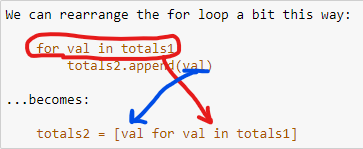

A way to interpret this is: we will traverse the list 'totals1' and each time refer to the list element as 'val'. We will then append 'val' to the new list.

Run this code now and see how the two lists are identical.

In [11]:
totals1 = [120.6, 522.1, 345.5, 761.2]
totals2 = [val for val in totals1]
print(f'totals1: {totals1}')
print(f'totals2: {totals2}')

totals1: [120.6, 522.1, 345.5, 761.2]
totals2: [120.6, 522.1, 345.5, 761.2]


### Altering 'val' in interesting ways

See this val? That is just a variable. 

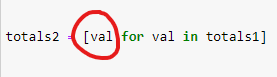

Let's take the original 'totals1' list now, and double every element to create the new list.

All we do is use 'val * 2' instead of this circled 'val' variable. Run this code:

In [12]:
totals1 = [120.6, 522.1, 345.5, 761.2]
totals2 = [val * 2 for val in totals1]
print(f'totals1: {totals1}')
print(f'totals2: {totals2}')

totals1: [120.6, 522.1, 345.5, 761.2]
totals2: [241.2, 1044.2, 691.0, 1522.4]


## Exercise 22-4 ============================

Alter the code such that the 'totals2' list represents the squared values of the 'totals1' list. Round 'val' to 2 decimal places. Sample output:

totals1: [120.6, 522.1, 345.5, 761.2]
totals2: [14544.36, 272588.41, 119370.25, 579425.44]

In [11]:
totals1 = [120.6, 522.1, 345.5, 761.2]
totals2 = [val ** 2 for val in totals1]
print(f'totals1: {totals1}')
print(f'totals2: {totals2}')

totals1: [120.6, 522.1, 345.5, 761.2]
totals2: [14544.359999999999, 272588.41000000003, 119370.25, 579425.4400000001]


## Filtering Using If 

Suppose we have this list of baseball teams:

    teams = ['Giants','Angels','Rockies','Mariners','Pirates','Red Sox',
                 'Royals','Yankees','Astros','Athletics']
         
Let's create a second list of teams that have names that are exactly six characters. We'll include them in the new list if this condition is true:

    len(name) == 6

We can use an If Statement with list comprehension. We just put the If Statement within the brackets.

#### Suppose this is the original code

Run this code that **doesn't** use list comprehension. It accomplishes the task, but note the program length.

In [14]:
teams = ['Giants','Angels','Rockies','Mariners','Pirates','Red Sox',
         'Royals','Yankees','Astros','Athletics']
teams2 = []  # create empty list for teams with 6 letters
for name in teams:
    if len(name) == 6:
        teams2.append(name)
print(f'Teams with 6 letters: ', teams2)

Teams with 6 letters:  ['Giants', 'Angels', 'Royals', 'Astros']


#### Note the ease of list comprehension, injecting the IF statement at the end:

In [15]:
teams = ['Giants','Angels','Rockies','Mariners','Pirates','Red Sox',
         'Royals','Yankees','Astros','Athletics']
teams2 = [name for name in teams if len(name) == 6]
print(f'Teams with 6 letters: ', teams2)

Teams with 6 letters:  ['Giants', 'Angels', 'Royals', 'Astros']


## Exercise 22-5 =====================

Here's a scenario: we got a database from our company's HR department containing employee last names. However, the list we got also appended the employee's first initial onto the last name, for example "dietrichm" or "bidenj". We need to fix that, because our information system needs a clean list of last names with nothing else appended to them.

Write a program that will create a correct new list based on the names list below (US government cabinet members). Do this using list comprehension.

    cabinet_incorrect = ['bidenj','harrisk','austinl','buttigiegp','blinkena','yellenj','garlandm']

Hint: list slicing from the previous lab. Remember list slicing works on strings too!

Hint: you can do this in three lines of code, including printing.

Sample output:

    ['biden', 'harris', 'austin', 'buttigieg', 'blinken', 'yellen', 'garland']

In [15]:
cabinet_incorrect = ['bidenj','harrisk','austinl','buttigiegp','blinkena','yellenj','garlandm']
cabinet_correct = [val[:len(val) - 1] for val in cabinet_incorrect]
print(cabinet_correct)

['biden', 'harris', 'austin', 'buttigieg', 'blinken', 'yellen', 'garland']
